In [1]:
from ultralytics import YOLO, checks, hub
import pandas as pd

In [2]:
checks()

Ultralytics YOLOv8.2.5 🚀 Python-3.11.7 torch-2.2.0+cu121 CUDA:0 (NVIDIA TITAN Xp, 12190MiB)
Setup complete ✅ (16 CPUs, 187.6 GB RAM, 38.5/184.8 GB disk)


In [3]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt') 

In [5]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Download the image locally
image_url = 'https://ultralytics.com/images/bus.jpg'
response = requests.get(image_url)
with open('bus.jpg', 'wb') as f:
    f.write(response.content)

In [7]:
# Load a model
model = YOLO('yolov8n.pt') 

In [8]:

def show_image(img, confidence_threshold=0.5):
    
    results = model(img)[0]

    # Get the image and detections
    image = Image.open('bus.jpg')
    confidences = []
    classes = []
    for box in results.boxes:
        box_coords = box.xyxy[0].cpu().numpy()
        confidence = box.conf[0].cpu().numpy()
        confidences.append(confidence.item())
        class_name = model.names[int(box.cls)]
        classes.append(class_name)
        if confidence < confidence_threshold:
            continue
        plt.gca().add_patch(plt.Rectangle((box_coords[0], box_coords[1]), 
                                        box_coords[2]-box_coords[0], 
                                        box_coords[3]-box_coords[1], 
                                        fill=False, edgecolor='r', lw=2))
        # Put label
        
        plt.text(box_coords[0], box_coords[1], class_name, color='r')

    plt.imshow(image, alpha=0.5)
    return pd.Series(confidences, classes, )


image 1/1 /home/nipun.batra/git/blog/posts/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 55.8ms
Speed: 3.2ms preprocess, 55.8ms inference, 1384.5ms postprocess per image at shape (1, 3, 640, 480)


bus          0.870545
person       0.868980
person       0.853604
person       0.819305
stop sign    0.346069
person       0.301294
dtype: float64

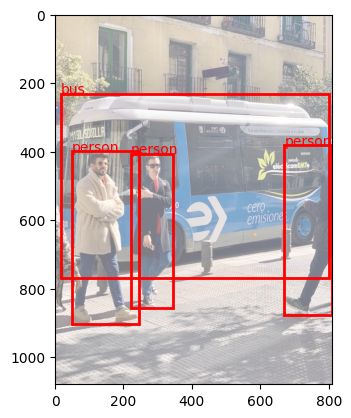

In [9]:
show_image('bus.jpg')

In [11]:
img = Image.open('bus.jpg')
res = model(img)[0]


0: 640x480 4 persons, 1 bus, 1 stop sign, 9.9ms
Speed: 20.6ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


In [20]:
res.boxes[0].prob

AttributeError: 'Boxes' object has no attribute 'prob'. See valid attributes below.

    Manages detection boxes, providing easy access and manipulation of box coordinates, confidence scores, class
    identifiers, and optional tracking IDs. Supports multiple formats for box coordinates, including both absolute and
    normalized forms.

    Attributes:
        data (torch.Tensor): The raw tensor containing detection boxes and their associated data.
        orig_shape (tuple): The original image size as a tuple (height, width), used for normalization.
        is_track (bool): Indicates whether tracking IDs are included in the box data.

    Properties:
        xyxy (torch.Tensor | numpy.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | numpy.ndarray): Confidence scores for each box.
        cls (torch.Tensor | numpy.ndarray): Class labels for each box.
        id (torch.Tensor | numpy.ndarray, optional): Tracking IDs for each box, if available.
        xywh (torch.Tensor | numpy.ndarray): Boxes in [x, y, width, height] format, calculated on demand.
        xyxyn (torch.Tensor | numpy.ndarray): Normalized [x1, y1, x2, y2] boxes, relative to `orig_shape`.
        xywhn (torch.Tensor | numpy.ndarray): Normalized [x, y, width, height] boxes, relative to `orig_shape`.

    Methods:
        cpu(): Moves the boxes to CPU memory.
        numpy(): Converts the boxes to a numpy array format.
        cuda(): Moves the boxes to CUDA (GPU) memory.
        to(device, dtype=None): Moves the boxes to the specified device.
    

In [22]:
# Access the detection results
results = model(img)

boxes = results[0].boxes

# Print class probabilities for each detected object
for box in boxes:
    class_probs = box.probs
    print(f"Bounding Box: {box.xyxy}")
    for class_id, prob in enumerate(class_probs):
        print(f"Class ID: {class_id}, Probability: {prob:.4f}")


0: 640x480 4 persons, 1 bus, 1 stop sign, 8.5ms
Speed: 23.1ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


AttributeError: 'Boxes' object has no attribute 'probs'. See valid attributes below.

    Manages detection boxes, providing easy access and manipulation of box coordinates, confidence scores, class
    identifiers, and optional tracking IDs. Supports multiple formats for box coordinates, including both absolute and
    normalized forms.

    Attributes:
        data (torch.Tensor): The raw tensor containing detection boxes and their associated data.
        orig_shape (tuple): The original image size as a tuple (height, width), used for normalization.
        is_track (bool): Indicates whether tracking IDs are included in the box data.

    Properties:
        xyxy (torch.Tensor | numpy.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | numpy.ndarray): Confidence scores for each box.
        cls (torch.Tensor | numpy.ndarray): Class labels for each box.
        id (torch.Tensor | numpy.ndarray, optional): Tracking IDs for each box, if available.
        xywh (torch.Tensor | numpy.ndarray): Boxes in [x, y, width, height] format, calculated on demand.
        xyxyn (torch.Tensor | numpy.ndarray): Normalized [x1, y1, x2, y2] boxes, relative to `orig_shape`.
        xywhn (torch.Tensor | numpy.ndarray): Normalized [x, y, width, height] boxes, relative to `orig_shape`.

    Methods:
        cpu(): Moves the boxes to CPU memory.
        numpy(): Converts the boxes to a numpy array format.
        cuda(): Moves the boxes to CUDA (GPU) memory.
        to(device, dtype=None): Moves the boxes to the specified device.
    

In [26]:
results[0].boxes[0].data

tensor([[ 17.2858, 230.5922, 801.5182, 768.4058,   0.8705,   5.0000]], device='cuda:0')

In [27]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   